# Proyecto Algoritmos Genéticos Ene-Jul 2020

## Algoritmo genético para resolver el Sudoku

<p>
El Sudoku puede considerarse un problema de optimización con restricciones, a nivel de fila, columna y subcuadrícula.

Objetivo: Utilizar un algoritmo genético para resolver el sudoku. 
Considere las siguientes recomendaciones:

Representación del individuo: El Sudoku es un claro ejemplo de representación basado en otros problemas de optimización combinatoria. Cada individuo (tablero) se codifica en un array de 81 posiciones; este array representa el cromosoma que está formado por 9 genes (filas). De esta forma, supongamos que tenemos el siguiente tablero

![](tablero.jpg)

<p> Una representación recomendada es que cada individuo o cromosoma se representa por un array compuesto por 9 genes de 9 elementos cada uno. Cada gen se corresponde con una fila del tablero. 


Las posiciones fijas del tablero se respetan y las posiciones vacías se representan como 0:

![](cromo.jpg)

<p> Cada valor del individuo o cromosoma tendrá un valor del 1 al 9. El cromosoma se inicializa con valores aleatorios entre 1 y 9, respetando las posiciones fijas y sin generar elementos repetidos dentro del gen (fila). 

<p><strong>Función de aptitud</strong> : La función de aptitud se basa en que los elementos de cada fila y columna deben ser los valores del conjunto Dígitos = {1,2,3,4,5,6,7,8,9}. La función calcula el número de elementos que faltan en cada submatriz y columna. A nivel de fila no existe penalización pues los elementos son permutaciones. 


Aptitud = total de faltas de cada subcuadrícula + total de faltas de las columnas

Se trata de un problema de minimización y el objetivo a conseguir aptitud 0. 

<p> <strong>Aptitud</strong> = total de faltas de cada subcuadrícula + total de faltas de las columnas

Se trata de un problema de minimización y el objetivo a conseguir aptitud 0. 

<p> <strong>Indicaciones</strong>
<br>
<ul>
    
<li> Se realizo en equipo:</li>
<ul> 
    <strong>
    <li> Cortez Esparza Eduardo Alejandro <br> </li> 
    <li> Reyes Peña Pedro Cesar<br> </li> 
    <li>Diaz Villegas Francisco Javier<br> </li> 
     <li>Aguire Castro Andres <br> </li> 
    </strong> 
   </ul> 
<p>
<li> Realizaras la implementación utilizando cualquier lenguaje de programación, biblioteca, librería, etc </li>
<strong> "Se hizo uso de la libreria pyevolve ademas de la herramienta jupyter para el lenguaje python"</strong>
<p>
<li>  Se entregara el código fuente y un documento en pdf con una descripción de las ejecuciones y un análisis de datos que se describen más adelante. </li>
<p>
<li>La solución deberá permitir que el usuario modifique los porcentajes de cruza, mutación y número máximo de generaciones. Si es posible modificar también el tamaño de la població</li>


### Codigo Fuente:

In [1]:
import ipywidgets as widgets
from pyevolve import Consts
from pyevolve import Crossovers
from pyevolve import G1DList
from pyevolve import Selectors
from pyevolve import DBAdapters
from pyevolve import FunctionSlot
from pyevolve import GAllele
from pyevolve import GenomeBase
from pyevolve import GPopulation
from pyevolve import GSimpleGA
from pyevolve import GTree
from pyevolve import Initializators
from pyevolve import Interaction
from pyevolve import Migration
from pyevolve import Mutators
from pyevolve import Scaling 
from pyevolve import Statistics
from pyevolve import Util
from IPython.display import Image

In [2]:
sudoku=[
0,0,6,0,0,0,0,0,0,
0,8,0,0,5,4,2,0,0,
0,4,0,0,9,0,0,7,0,
0,0,7,9,0,0,3,0,0,
0,0,0,0,8,0,4,0,0,
6,0,0,0,0,0,1,0,0,
2,0,3,0,6,7,9,8,1,
0,0,0,5,0,0,0,4,0,
4,7,8,3,1,9,5,6,2]

In [3]:
def gen(tablero,ngen):
    # esta funcion retorna una lista de gen(fila) del sudoku 
    gen=[]
    for i in range(9):
        gen.append(tablero[ngen*9+i])
    return gen

In [4]:
def columna(tablero, ncolumna):
    # esta funcion las columnas del sudoku
    columna=[]
    for i in range(9):
        columna.append(tablero[i*9+ncolumna])
    return columna

In [5]:
def subcuadricula(tablero,ncuadricula):
    # funcion que retorna el subcuadricula o cuadrante de izquierda a derecha y luego hacia abajo
    subcuadricula=[]
    cuadriculainicio=int(ncuadricula/3)*9*3+(ncuadricula-int(ncuadricula/3)*3)*3
    for indiceX in range(3):
        for indiceY in range(3):
            subcuadricula.append(tablero[cuadriculainicio+indiceX*9+indiceY])
    return subcuadricula

In [6]:
def aptitud(cromosoma):
    #esta es la funcion de aptitud, sin errores, significa que se encontro la solucion
    error=0
    for index in range (9):
        for elemento in [gen(cromosoma,index),columna(cromosoma,index),subcuadricula(cromosoma,index)]:
            for getal in [1,2,3,4,5,6,7,8,9]:
                # verifica los números repetidos del individuo
                if (elemento.count(getal))>1:
                    error+=elemento.count(getal)-1
 
    for i,getal in enumerate(cromosoma):
        # verifica que los números que no coinciden con los números iniciales
        if getal!=sudoku[i] and sudoku[i]!=0:
            error+=2
    return error

In [7]:
def data(ngeneraciones,cruza,mutacion):
    sqlite_adapter = DBAdapters.DBSQLite(identify="sudoku", resetDB=True)  #Para generar la grafica de aptitud
    genoma = G1DList.G1DList(81) 
    genoma.setParams(rangemin=1,rangemax=9) 
    genoma.evaluator.set(aptitud)
    genoma.setParams(bestrawscore=0.00, rounddecimal=2) # redondea las aptitudes
    genoma.crossover.set(Crossovers.G1DListCrossoverSinglePoint) # cambia la cruza a de un solo punto
    ga = GSimpleGA.GSimpleGA(genoma)
    ga.selector.set(Selectors.GRouletteWheel) # cambia la seleccion por ruleta
    ga.setMinimax(Consts.minimaxType["minimize"]) # se minimiza para reducir la cantidad de ceros del tablero
    ga.setMutationRate(mutacion) #asignamos el % de mutacion
    ga.setGenerations(ngeneraciones) #asignamos la cantidad de genereaciones a crear
    ga.setPopulationSize(81) #defiine el tamaño de la poblacion de nuestro tablero
    ga.setCrossoverRate(cruza) # definimos el rango de cruza
    ga.setElitismReplacement(1) # para eligir un solo individuo elite
    ga.terminationCriteria.set(GSimpleGA.RawScoreCriteria) 
    ga.setDBAdapter(sqlite_adapter) #definimos donde se guardaran los datos
    ga.evolve(freq_stats=100) #definimos la cantidad de frequencia a la que evolucionara 
    best = ga.bestIndividual() # generamos el individuo mas apto
    print best

### Se permite que el usuario modifique los porcentajes de cruza, mutación y número máximo de generaciones.

In [8]:
#Grafico interactivo para modificar aspectos del algoritmo
mutacion =widgets.FloatSlider(value =0.04,step = 0.01,min =0, max=1, description='% Mutacion:')
ngeneraciones = widgets.BoundedIntText(value=1000,min=0,max=500000,step=100,description='Generaciones:',disabled=False)
cruza = widgets.FloatSlider(value=1,min=0.1,max=1,step=0.05,description='% Cruza:')
selecion = widgets.VBox([cruza,mutacion,ngeneraciones])
widgets.interact(data,ngeneraciones=ngeneraciones,cruza=cruza,mutacion=mutacion)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEJvdW5kZWRJbnRUZXh0KHZhbHVlPTEwMDAsIGRlc2NyaXB0aW9uPXUnR2VuZXJhY2lvbmVzOicsIG1heD01MDAwMDAsIHN0ZXA9MTAwKSwgRmxvYXRTbGnigKY=


<function __main__.data>

### Se Guarda la ejecución del mejor individuo y su aptitud ademas se grafica la apitud. Con esto debemos poder ver que el mejor individuo va mejorando en el transcurso del las iteraciones 

In [9]:
%%capture
!python C:\Python27\Scripts\pyevolve_graph.py -i sudoku -4 -o graph_sudoku

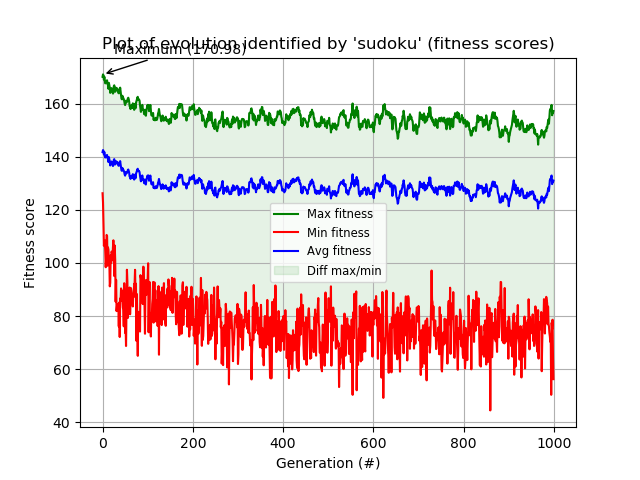

In [10]:
Image(filename='graph_sudoku.png') 